In [79]:
!pip install squarify

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyof
import plotly.figure_factory as pyff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as pg
import squarify 
%matplotlib notebook

In [81]:
data=pd.read_csv('Heart_Disease_Prediction.csv')

In [82]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [83]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [84]:
data.shape

(270, 14)

In [85]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [86]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [87]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [88]:
data['Heart Disease'].nunique()

2

In [89]:
data['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [90]:
for i in data.columns:
    print(i)
    print(data[i].nunique())
    print(data[i].unique())

Age
41
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Sex
2
[1 0]
Chest pain type
4
[4 3 2 1]
BP
47
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Cholesterol
144
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
FBS over 120
2
[0 1]
EKG res

In [91]:
data['Number of vessels fluro'].unique()

array([3, 0, 1, 2], dtype=int64)

In [92]:
data['Thallium'].unique()

array([3, 7, 6], dtype=int64)

In [93]:
dup=data.duplicated().sum()
dup

0

In [94]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [96]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [97]:
data['Chest pain type']=data['Chest pain type'].map({1:0,2:1,3:2,4:3})
data['Thallium']=data['Thallium'].map({3:1,6:2,7:3})
data['Slope of ST']=data['Slope of ST'].map({1:0,2:1,3:2})

In [98]:
data['Sex'] = data['Sex'].replace({1: "Male", 0: "Female"})
data['Chest pain type'] = data['Chest pain type'].replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
data['Exercise angina'] = data['Exercise angina'].replace({1: "Yes", 0: "No"})
data['FBS over 120'] = data['FBS over 120'].replace({1: "True", 0: "False"})
data['Slope of ST'] = data['Slope of ST'].replace({2: "upsloping", 1: "flat",0:"downsloping"})
data['Thallium'] = data['Thallium'].replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})
data['EKG results']=data['EKG results'].replace({0:"showing probable or definite left ventricular hypertrophy by Estes’ criteria",1:"normal",2:"having ST-T wave abnormality"})
data['Number of vessels fluro']=data['Number of vessels fluro'].replace({0:"0",1:"1",2:"2",3:"3"})

<IPython.core.display.Javascript object>


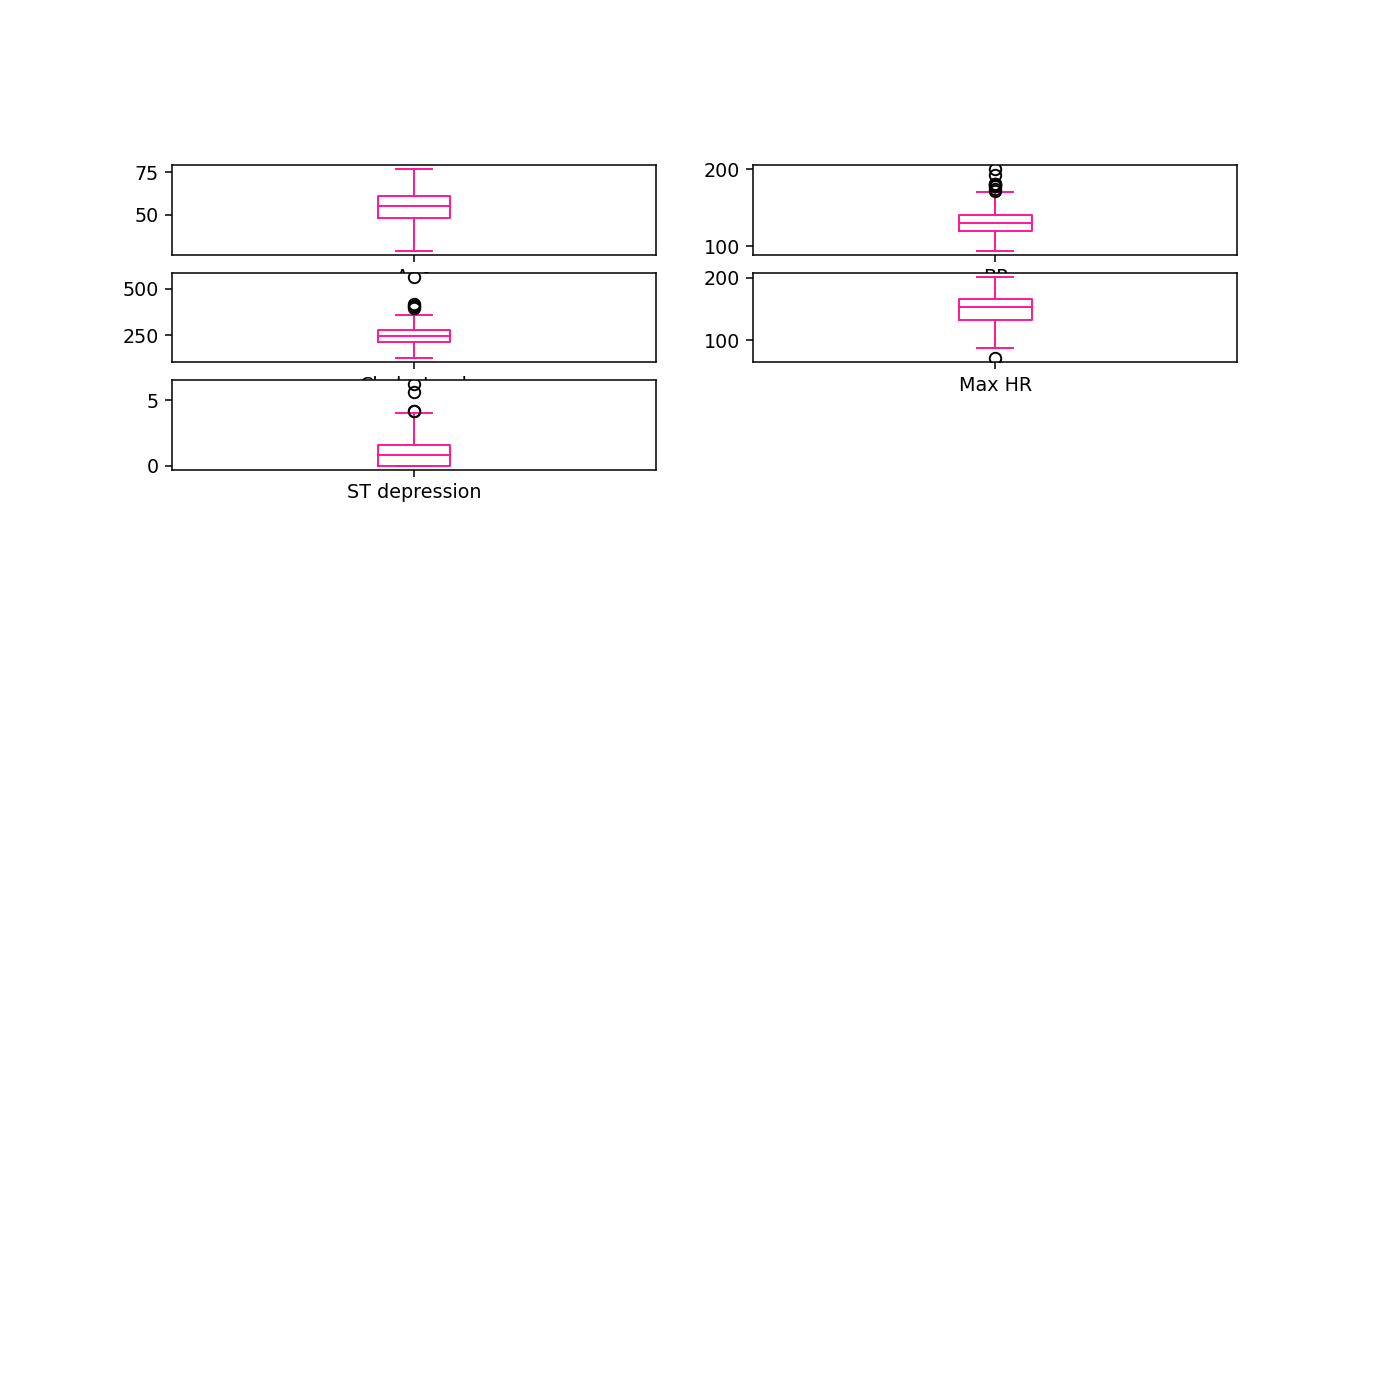

In [99]:
data.plot(kind='box', subplots=True, layout=(10,2),
sharex=False,sharey=False, figsize=(10, 10), 
color='deeppink');

In [100]:
continous_features = ['Age','BP','Cholesterol','Max HR','ST depression']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features])


For the feature Age, No of Outliers is 0
For the feature BP, No of Outliers is 9
For the feature Cholesterol, No of Outliers is 5
For the feature Max HR, No of Outliers is 1
For the feature ST depression, No of Outliers is 4


In [101]:
outliers(data[continous_features],drop=True)

Outliers from Age feature removed
Outliers from BP feature removed
Outliers from Cholesterol feature removed
Outliers from Max HR feature removed
Outliers from ST depression feature removed


In [102]:
d=data['Heart Disease'].value_counts()
d

Absence     144
Presence    108
Name: Heart Disease, dtype: int64

In [103]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [104]:
type(d)

pandas.core.series.Series

In [105]:
d.index

Index(['Absence', 'Presence'], dtype='object')

In [106]:
d.values

array([144, 108], dtype=int64)

In [107]:
trace = pg.Bar(x=d.index,
               y= d.values,
               text = d.values,
               textposition = 'inside',
               name = 'target')
d1= [trace]
layout = pg.Layout(
    autosize=False,
    width=600,
    height=400,title = "target distribution"
)

fig = pg.Figure(data=d1, layout=layout)
iplot(fig)

In [108]:
d.values.sum()

252

In [109]:
trace = pg.Bar(x=d.index,
               y= np.round(d.values/d.values.sum(),2),
               text = np.round(d.values/d.values.sum(),2),
               textposition = 'inside',
               name = 'target')
d1 = [trace]
layout = pg.Layout(
    autosize=False,
    width=600,
    height=400,title = "target Distribution"
)

fig = pg.Figure(data=d1, layout=layout)
iplot(fig)

In [110]:
d1=[pg.Histogram(x=data['Age'])]
layout=pg.Layout(title='Age distribution')
fig=pg.Figure(data=d1,layout=layout)
iplot(fig)

In [111]:
print(min(data['Age']))
print(max(data['Age']))
print(data['Age'].mean())

29
77
54.03174603174603


<IPython.core.display.Javascript object>


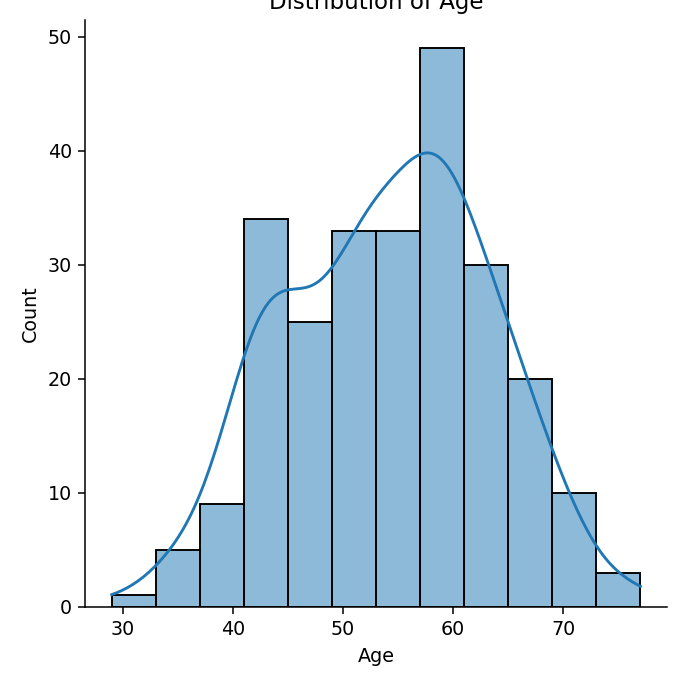

<IPython.core.display.Javascript object>


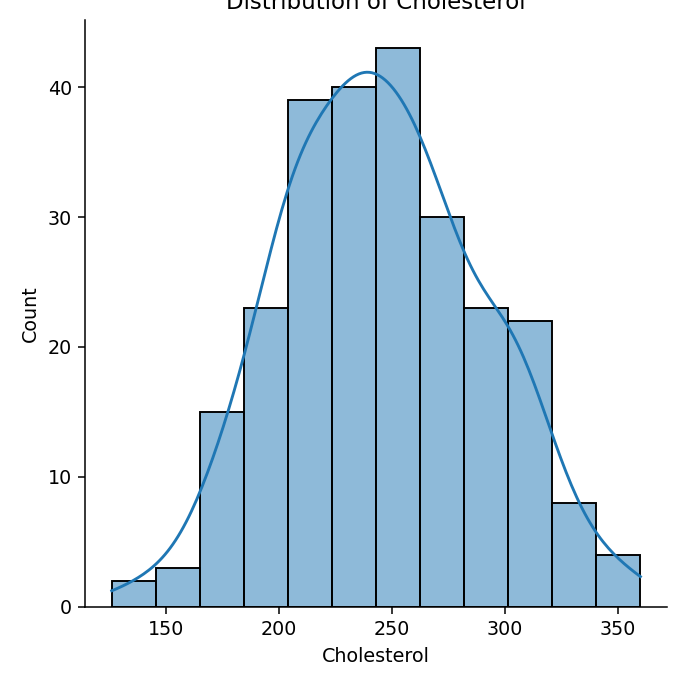

<IPython.core.display.Javascript object>


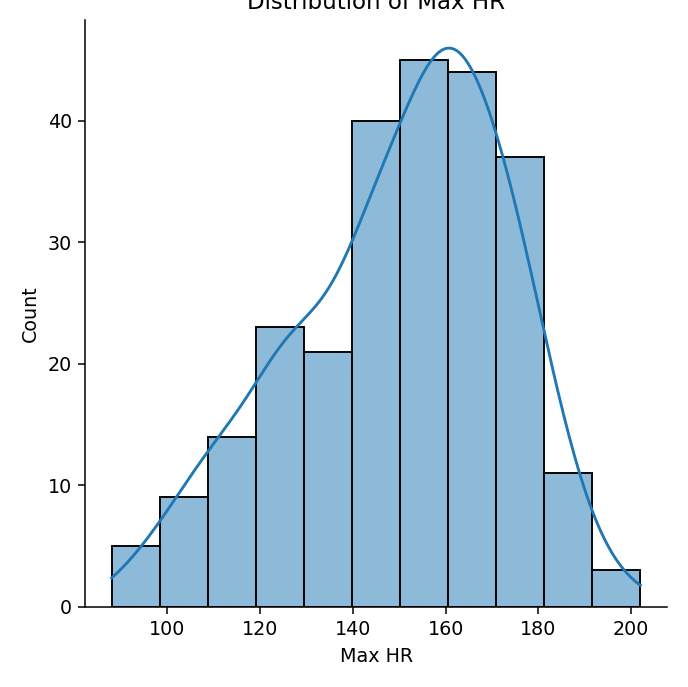

<IPython.core.display.Javascript object>


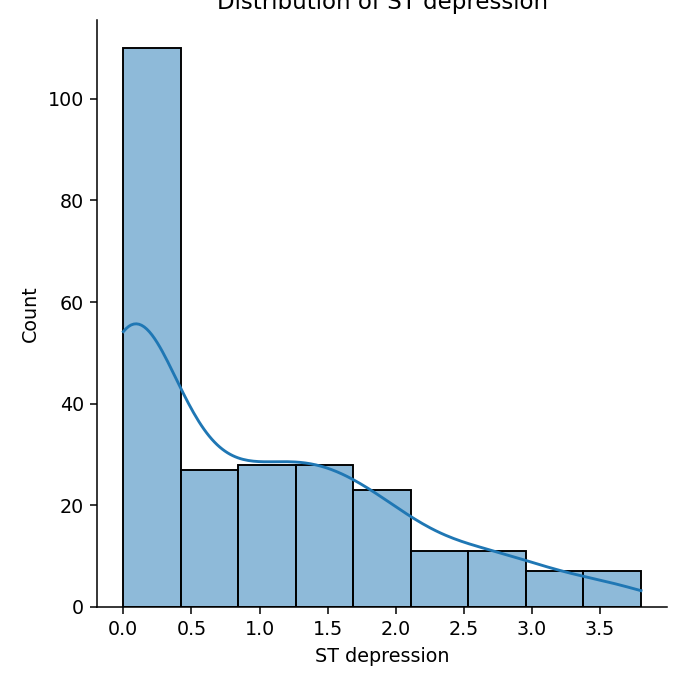

<IPython.core.display.Javascript object>


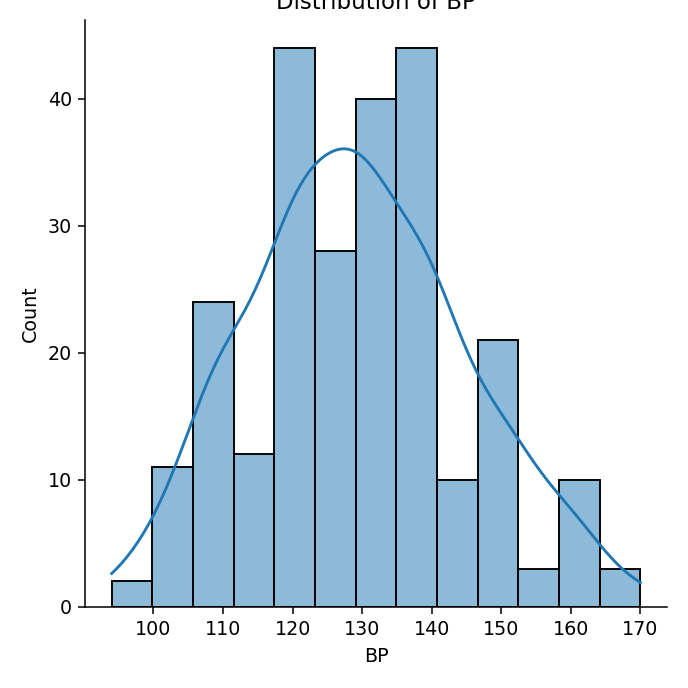

In [112]:
variables = ['Age','Cholesterol','Max HR', 'ST depression','BP']
# Plot the distribution plots
for variable in variables:
    sns.displot(data[variable], kde=True)
    plt.title(f"Distribution of {variable}")
    plt.show()

<IPython.core.display.Javascript object>


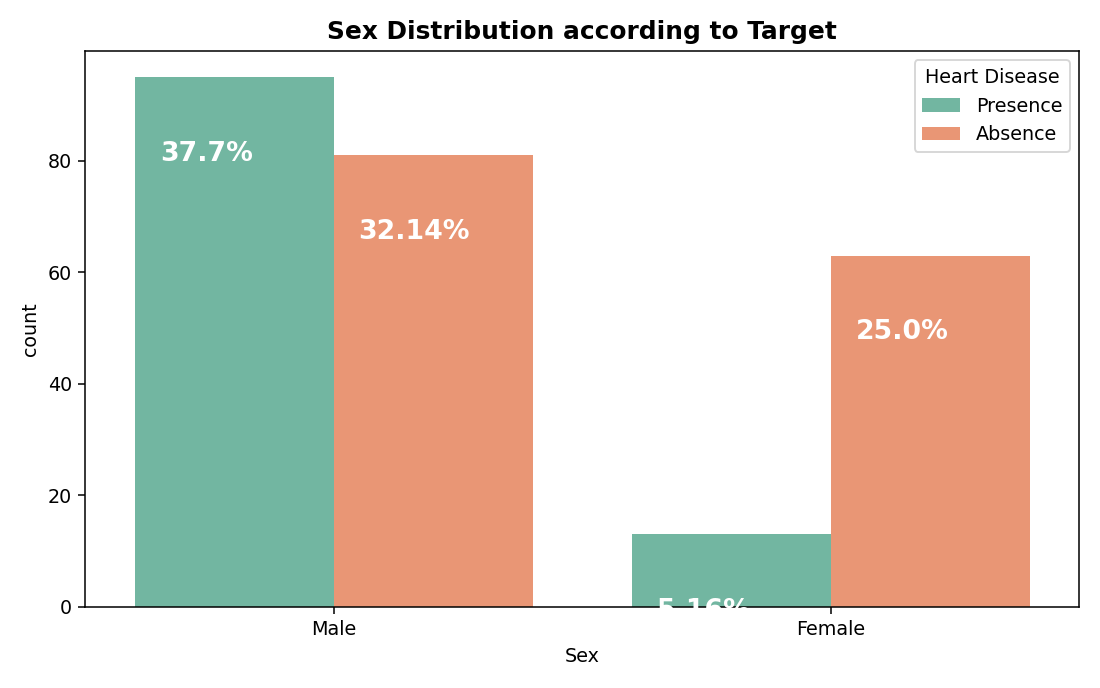

In [113]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['Sex']
ax = sns.countplot(x='Sex', hue='Heart Disease', data=data, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


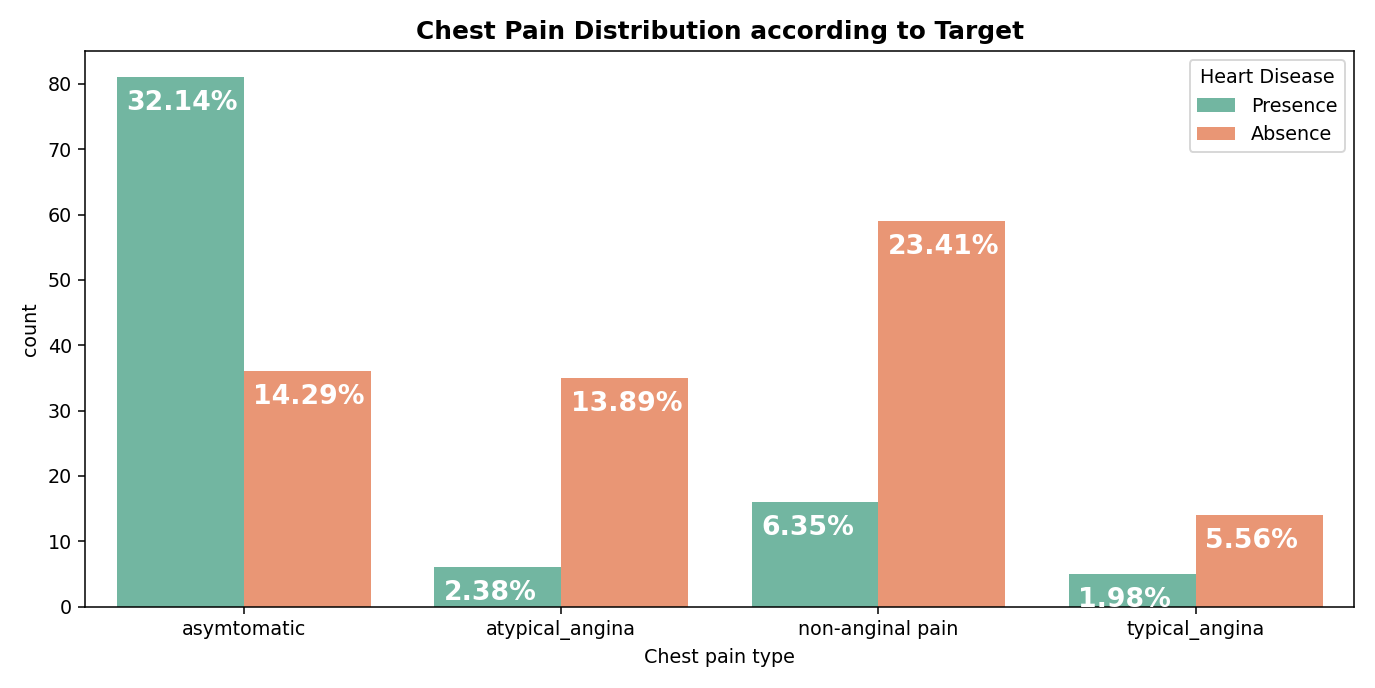

In [114]:
ig, ax = plt.subplots(figsize=(10,5))
name = data['Chest pain type']
ax = sns.countplot(x='Chest pain type', hue='Heart Disease', data=data, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


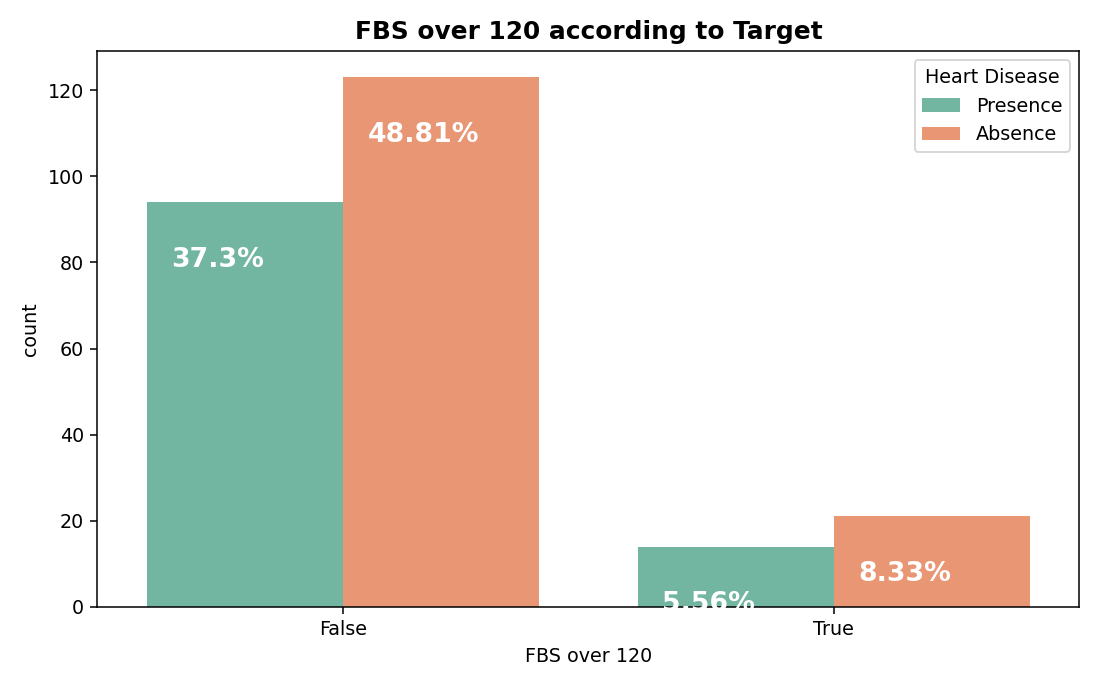

In [115]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['FBS over 120']
ax = sns.countplot(x='FBS over 120', hue='Heart Disease', data=data, palette='Set2')
ax.set_title('FBS over 120 according to Target', fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


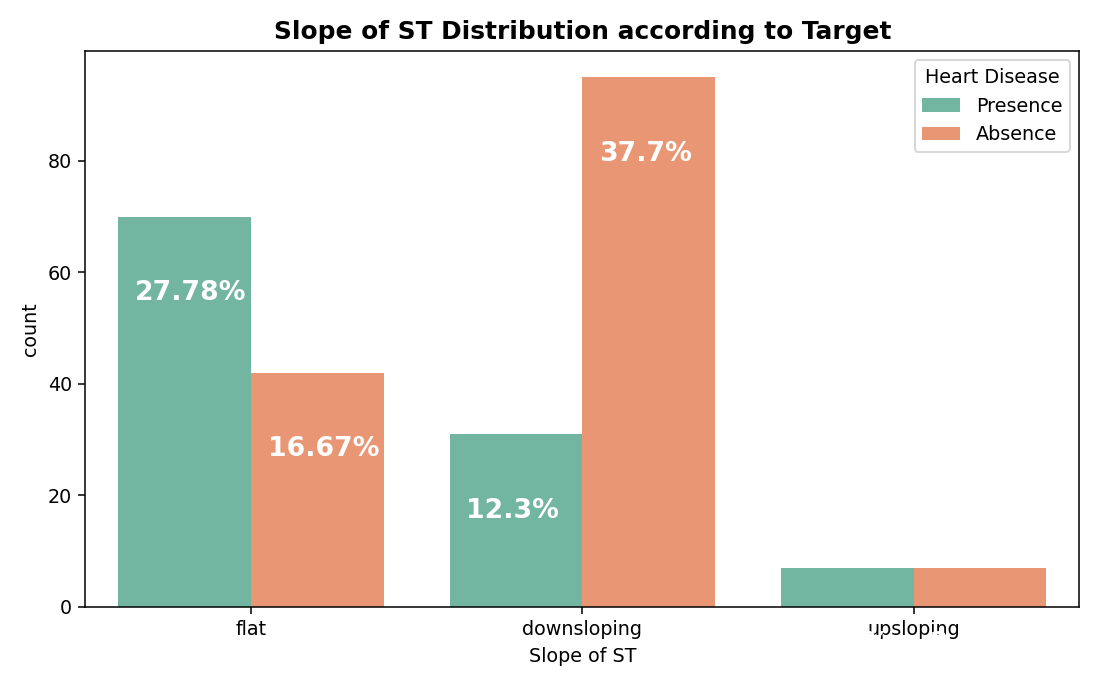

In [116]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['Slope of ST']
ax = sns.countplot(x='Slope of ST', hue='Heart Disease', data=data, palette='Set2')
ax.set_title("Slope of ST Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


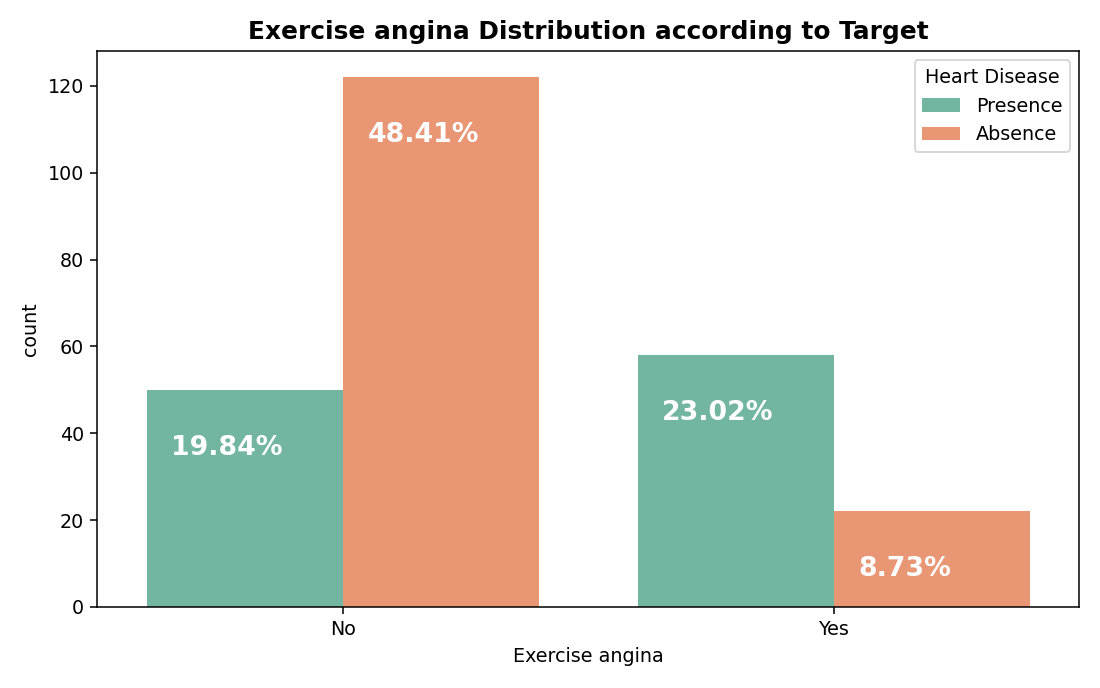

In [117]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['Exercise angina']
ax = sns.countplot(x='Exercise angina', hue='Heart Disease', data=data, palette='Set2')
ax.set_title("Exercise angina Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


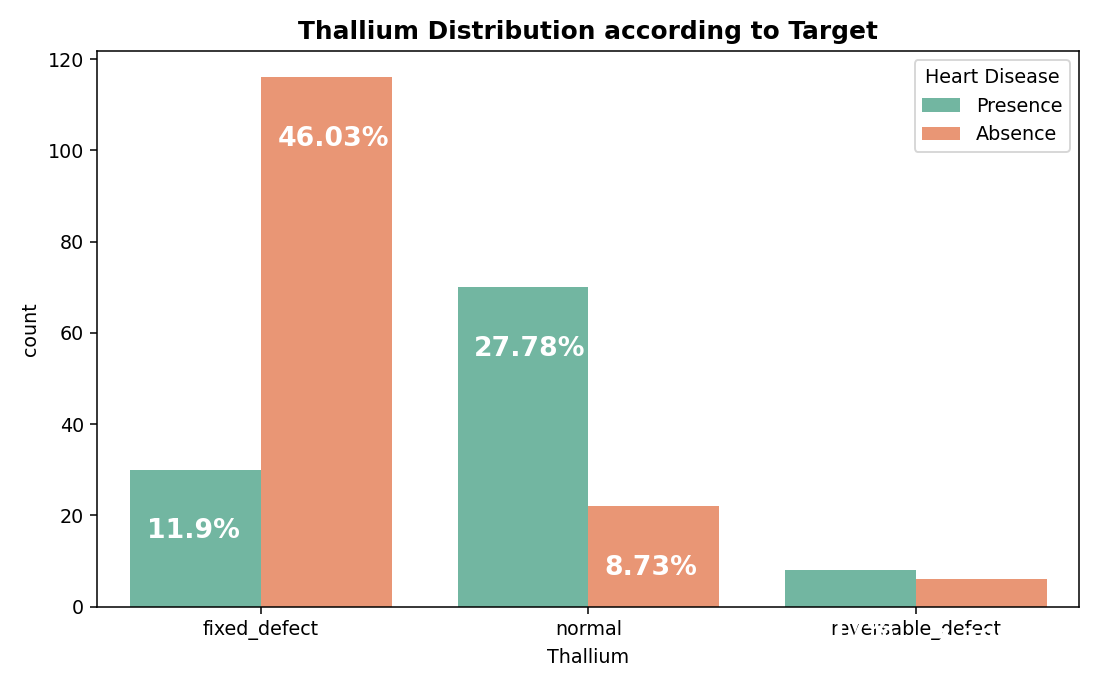

In [118]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['Thallium']
ax = sns.countplot(x='Thallium', hue='Heart Disease', data=data, palette='Set2')
ax.set_title("Thallium Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

<IPython.core.display.Javascript object>


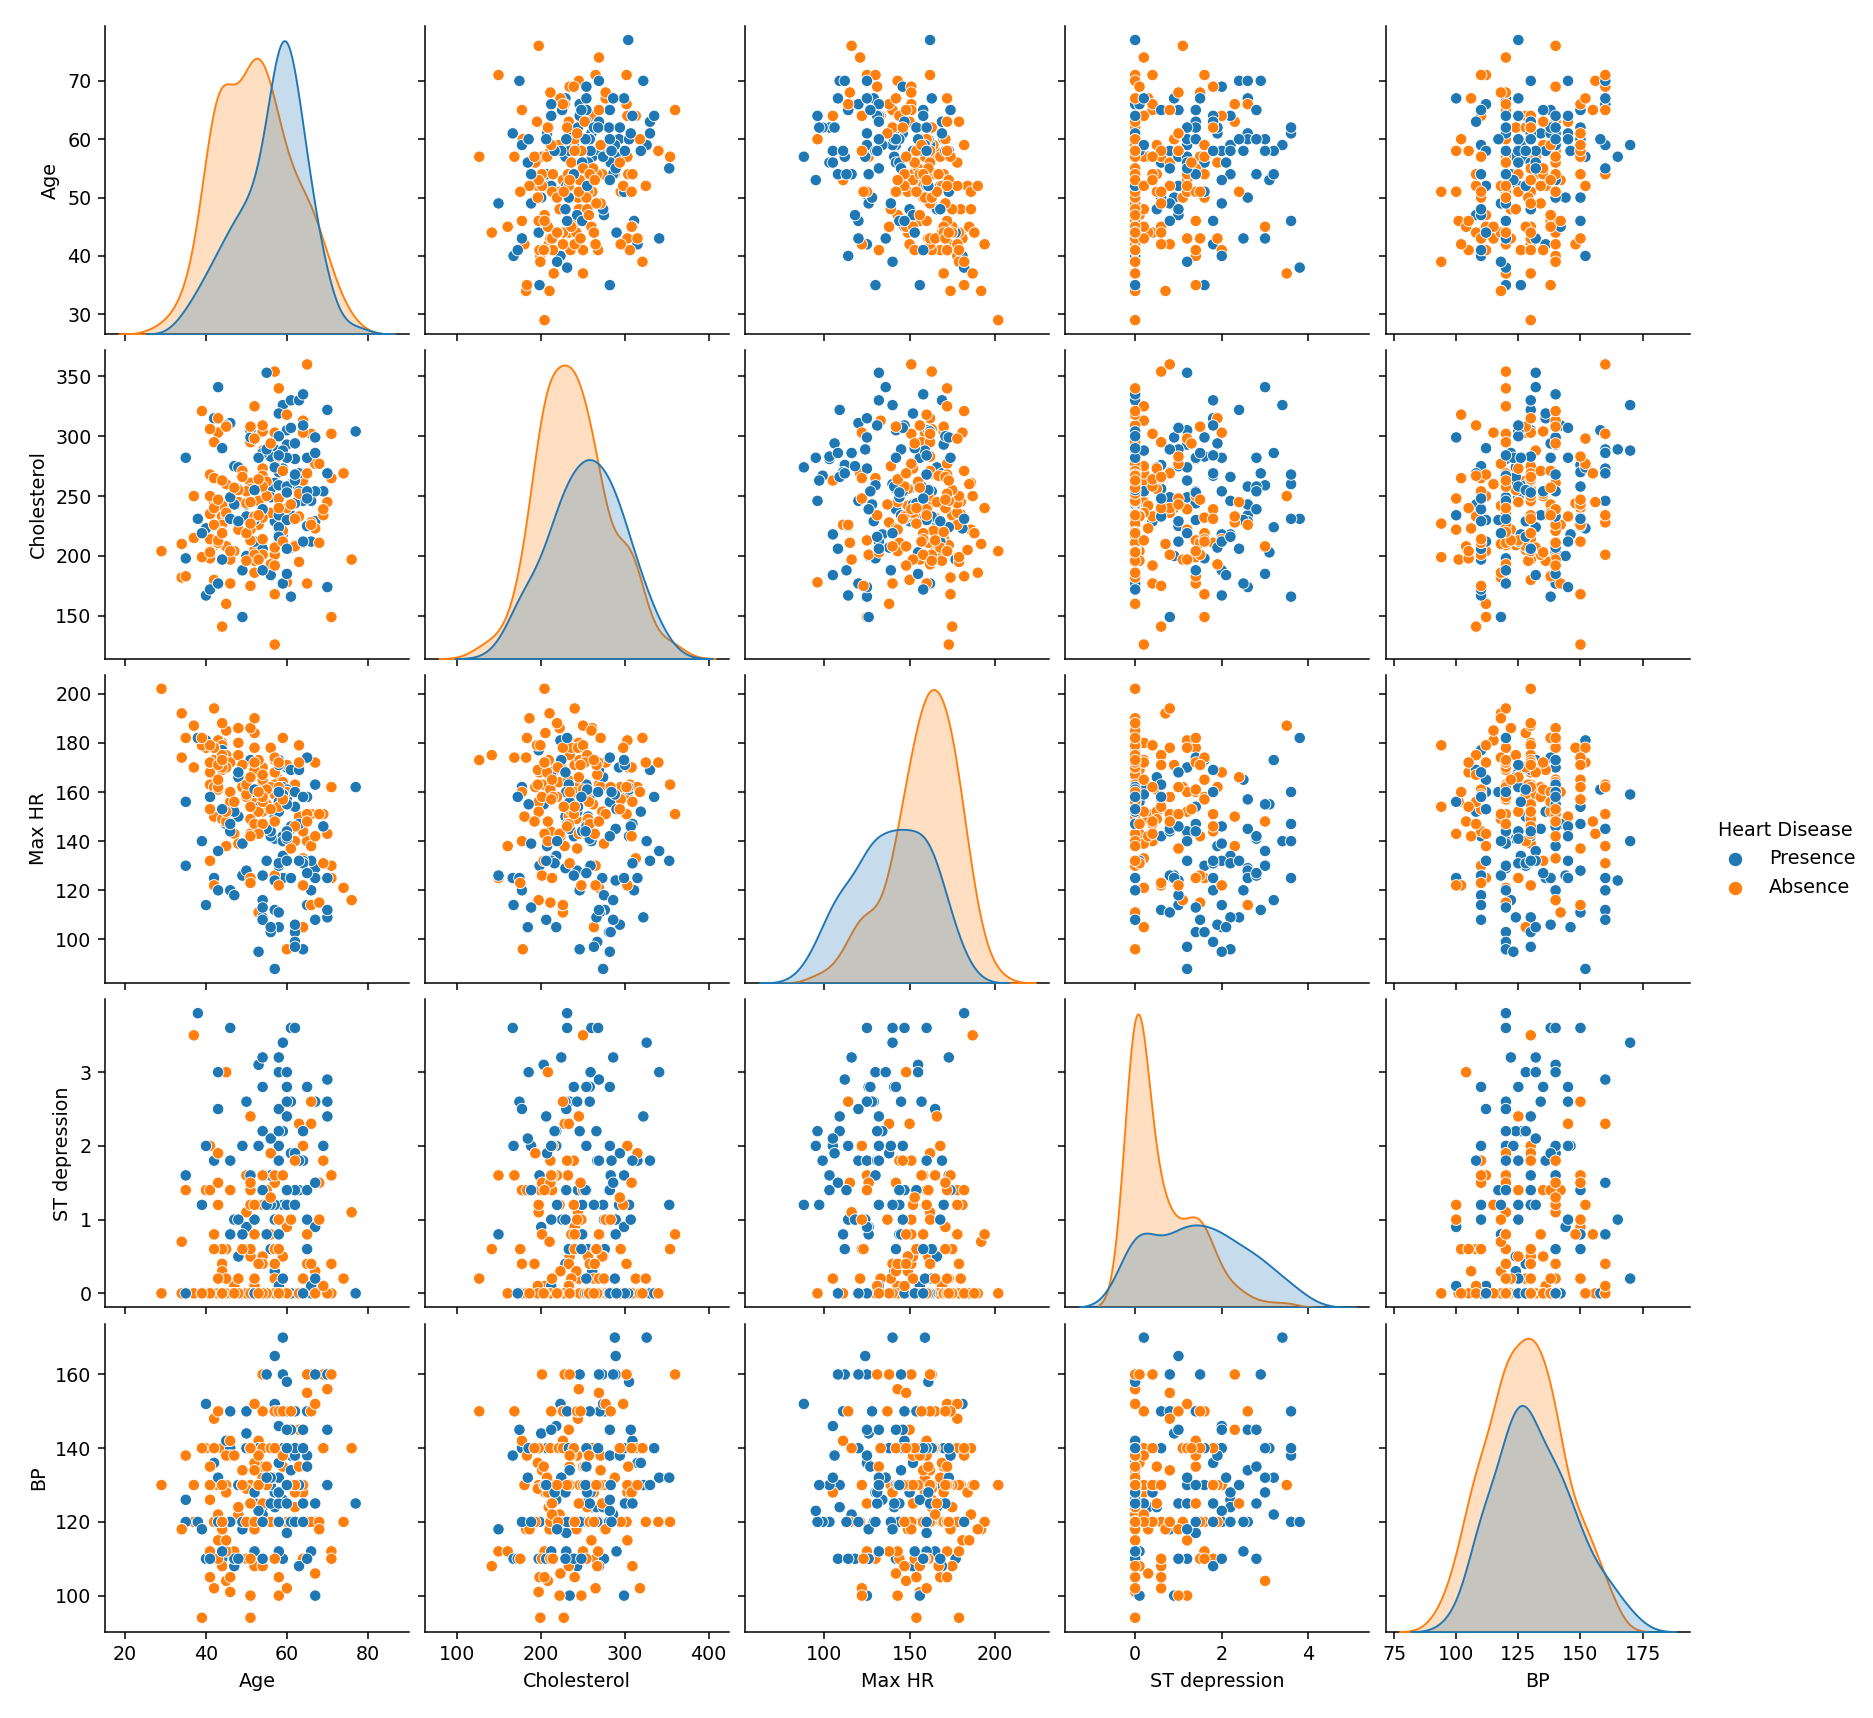

In [119]:
variables = ['Age','Cholesterol','Max HR', 'ST depression','BP','Heart Disease']
data_subset = data[variables]
sns.pairplot(data_subset,hue='Heart Disease')
plt.show()

In [120]:
data.dtypes

Age                          int64
Sex                         object
Chest pain type             object
BP                           int64
Cholesterol                  int64
FBS over 120                object
EKG results                 object
Max HR                       int64
Exercise angina             object
ST depression              float64
Slope of ST                 object
Number of vessels fluro     object
Thallium                    object
Heart Disease               object
dtype: object

In [121]:
data['Heart Disease']=data['Heart Disease'].map({'Presence':1,'Absence':0})
data.dtypes

Age                          int64
Sex                         object
Chest pain type             object
BP                           int64
Cholesterol                  int64
FBS over 120                object
EKG results                 object
Max HR                       int64
Exercise angina             object
ST depression              float64
Slope of ST                 object
Number of vessels fluro     object
Thallium                    object
Heart Disease                int64
dtype: object

<IPython.core.display.Javascript object>


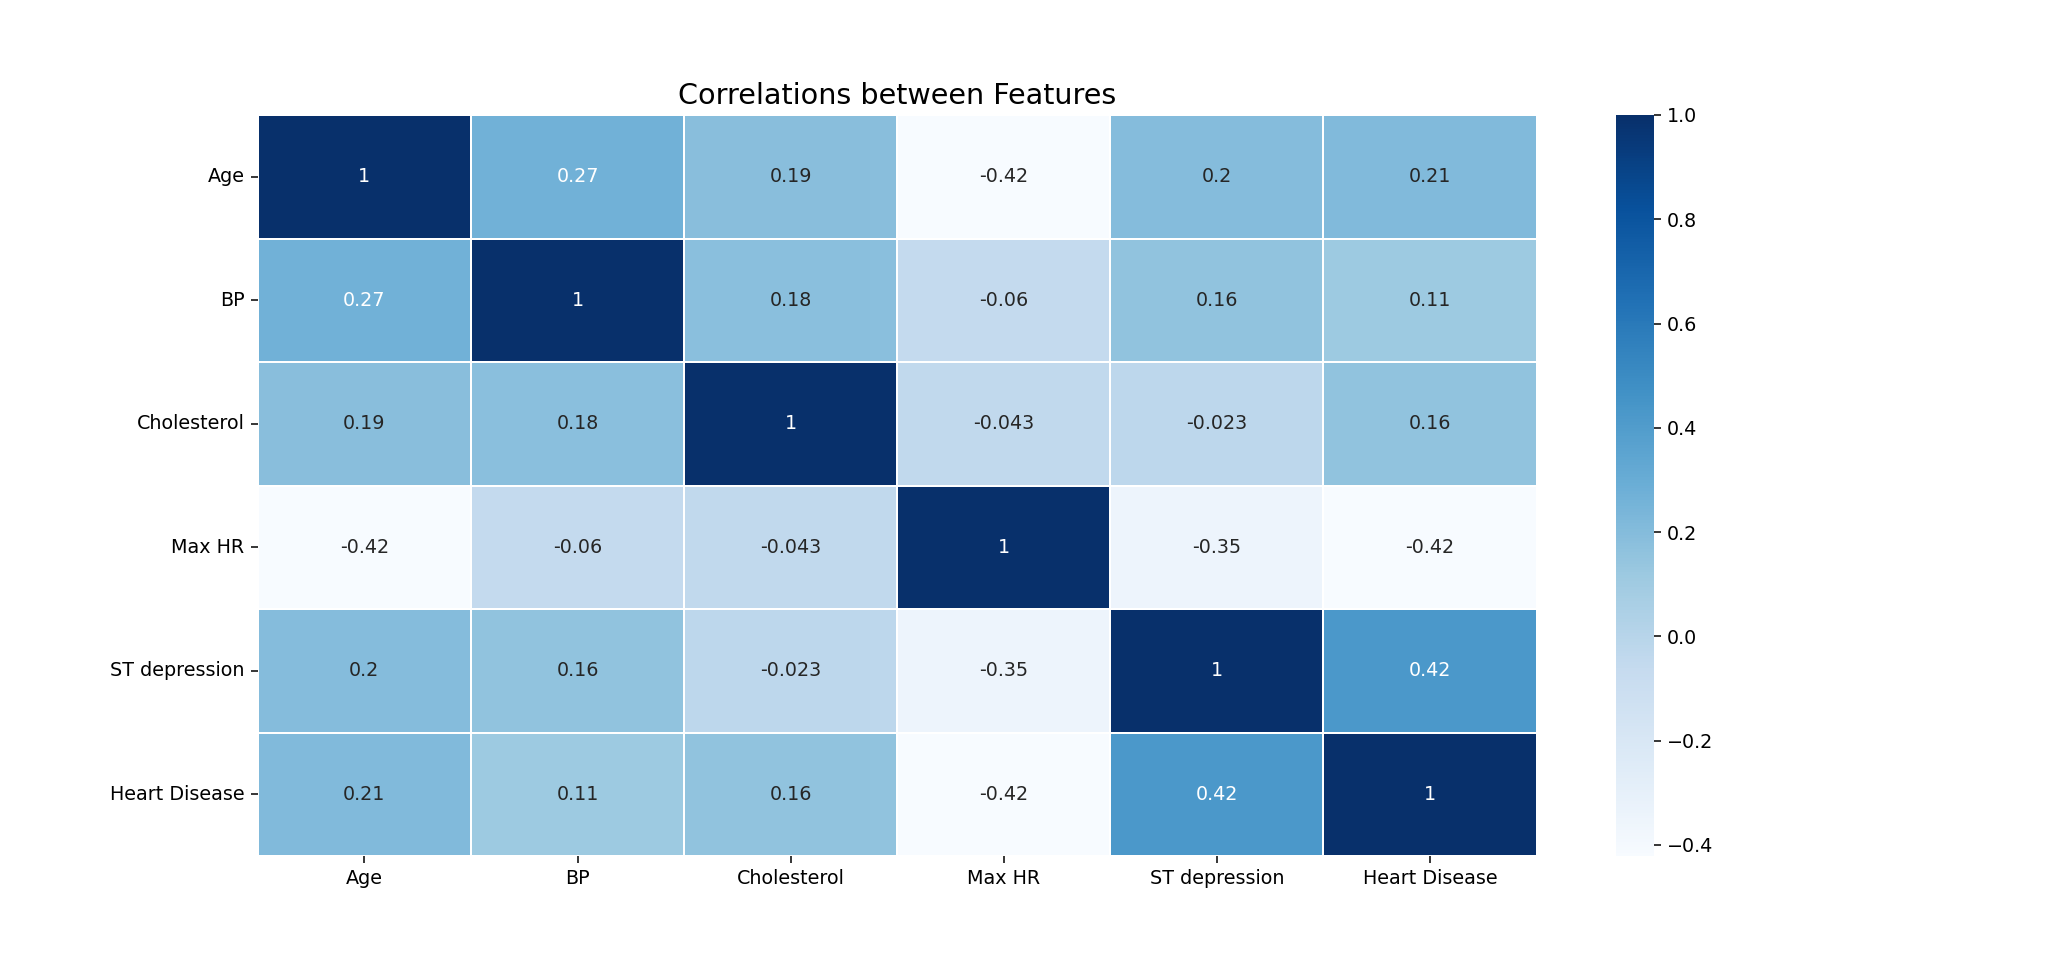

In [122]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, linewidth=0.2, cmap='Blues')
plt.title('Correlations between Features', fontsize=15)
plt.show()

In [123]:
data['Heart Disease']

0      1
2      1
3      0
4      0
5      0
      ..
264    1
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 252, dtype: int64

In [124]:
target=data['Heart Disease']
target

0      1
2      1
3      0
4      0
5      0
      ..
264    1
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 252, dtype: int64

In [125]:
data1=data.drop('Heart Disease',axis=1)

In [126]:
data1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,Male,asymtomatic,130,322,False,having ST-T wave abnormality,109,No,2.4,flat,3,fixed_defect
2,57,Male,atypical_angina,124,261,False,showing probable or definite left ventricular ...,141,No,0.3,downsloping,0,normal
3,64,Male,asymtomatic,128,263,False,showing probable or definite left ventricular ...,105,Yes,0.2,flat,1,normal
4,74,Female,atypical_angina,120,269,False,having ST-T wave abnormality,121,Yes,0.2,downsloping,1,fixed_defect
5,65,Male,asymtomatic,120,177,False,showing probable or definite left ventricular ...,140,No,0.4,downsloping,0,normal


In [127]:
categorical=data1.select_dtypes(include='object')

In [128]:
categorical

,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,Slope of ST,Number of vessels fluro,Thallium
0,Male,asymtomatic,False,having ST-T wave abnormality,No,flat,3,fixed_defect
2,Male,atypical_angina,False,showing probable or definite left ventricular ...,No,downsloping,0,normal
3,Male,asymtomatic,False,showing probable or definite left ventricular ...,Yes,flat,1,normal
4,Female,atypical_angina,False,having ST-T wave abnormality,Yes,downsloping,1,fixed_defect
5,Male,asymtomatic,False,showing probable or definite left ventricular ...,No,downsloping,0,normal
...,...,...,...,...,...,...,...,...
264,Male,atypical_angina,False,showing probable or definite left ventricular ...,No,upsloping,0,normal
266,Male,atypical_angina,False,showing probable or definite left ventricular ...,No,downsloping,0,normal
267,Female,atypical_angina,False,having ST-T wave abnormality,No,flat,0,fixed_defect
268,Male,asymtomatic,False,showing probable or definite left ventricular ...,No,flat,0,reversable_defect


In [129]:
numerical=data1.select_dtypes(include=['int','float'])

In [130]:
numerical

,Age,BP,Cholesterol,Max HR,ST depression
0,70,130,322,109,2.4
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2
5,65,120,177,140,0.4
...,...,...,...,...,...
264,48,110,229,168,1.0
266,44,120,263,173,0.0
267,56,140,294,153,1.3
268,57,140,192,148,0.4


In [131]:
num_col=numerical.columns
num_col

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], dtype='object')

In [132]:
cat_col=categorical.columns
cat_col

Index(['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
       'Exercise angina', 'Slope of ST', 'Number of vessels fluro',
       'Thallium'],
      dtype='object')

In [133]:
data1.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [134]:
num=pd.DataFrame(numerical)
num

,Age,BP,Cholesterol,Max HR,ST depression
0,70,130,322,109,2.4
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2
5,65,120,177,140,0.4
...,...,...,...,...,...
264,48,110,229,168,1.0
266,44,120,263,173,0.0
267,56,140,294,153,1.3
268,57,140,192,148,0.4


In [135]:
cat_encoded= pd.get_dummies(categorical, drop_first=True)

In [136]:
cat_encoded

,Sex_Male,Chest pain type_atypical_angina,Chest pain type_non-anginal pain,Chest pain type_typical_angina,FBS over 120_True,EKG results_normal,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Slope of ST_flat,Slope of ST_upsloping,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_normal,Thallium_reversable_defect
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0
266,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
267,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
268,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [137]:
data2=pd.concat([num,cat_encoded],axis=1)
data2

,Age,BP,Cholesterol,Max HR,ST depression,Sex_Male,Chest pain type_atypical_angina,Chest pain type_non-anginal pain,Chest pain type_typical_angina,FBS over 120_True,EKG results_normal,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Slope of ST_flat,Slope of ST_upsloping,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_normal,Thallium_reversable_defect
0,70,130,322,109,2.4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,57,124,261,141,0.3,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,64,128,263,105,0.2,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0
4,74,120,269,121,0.2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
5,65,120,177,140,0.4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,48,110,229,168,1.0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0
266,44,120,263,173,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
267,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
268,57,140,192,148,0.4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [138]:
categorical.isnull().sum()

Sex                        0
Chest pain type            0
FBS over 120               0
EKG results                0
Exercise angina            0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data2,target,test_size=0.25,random_state=42)

In [140]:
x_train.head()

,Age,BP,Cholesterol,Max HR,ST depression,Sex_Male,Chest pain type_atypical_angina,Chest pain type_non-anginal pain,Chest pain type_typical_angina,FBS over 120_True,EKG results_normal,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Slope of ST_flat,Slope of ST_upsloping,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_normal,Thallium_reversable_defect
170,69,160,234,131,0.1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0
83,41,130,214,168,2.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
264,48,110,229,168,1.0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0
255,71,160,302,162,0.4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
213,58,128,216,131,2.2,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0


In [141]:
x_train.shape

(189, 20)

In [142]:
x_test.head()

,Age,BP,Cholesterol,Max HR,ST depression,Sex_Male,Chest pain type_atypical_angina,Chest pain type_non-anginal pain,Chest pain type_typical_angina,FBS over 120_True,EKG results_normal,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Slope of ST_flat,Slope of ST_upsloping,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_normal,Thallium_reversable_defect
178,67,125,254,163,0.2,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
7,59,110,239,142,1.2,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0
119,56,130,283,103,1.6,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
186,56,132,184,105,2.1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1
123,65,160,360,151,0.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
x_test.shape

(63, 20)

In [144]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rfe_rf=RFE(rf,n_features_to_select=12,verbose=20)
rfe_rf.fit(x_train,y_train)
names=x_train.columns.tolist()
b=rfe_rf.ranking_
a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
a.to_csv('feature_selection.csv')
RFE_selected=a['features'][a['rank']==1]

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


In [145]:
RFE_selected

0                                                   Age
1                                                    BP
2                      Chest pain type_non-anginal pain
3                                           Cholesterol
4     EKG results_showing probable or definite left ...
5                                   Exercise angina_Yes
6                                                Max HR
7                             Number of vessels fluro_1
8                                         ST depression
9                                              Sex_Male
10                                     Slope of ST_flat
11                                      Thallium_normal
Name: features, dtype: object

In [146]:
x_train=x_train[RFE_selected]

In [147]:
x_test=x_test[RFE_selected]

In [148]:
x_train.head()

,Age,BP,Chest pain type_non-anginal pain,Cholesterol,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Max HR,Number of vessels fluro_1,ST depression,Sex_Male,Slope of ST_flat,Thallium_normal
170,69,160,0,234,0,0,131,1,0.1,1,1,0
83,41,130,1,214,0,0,168,0,2.0,1,1,0
264,48,110,0,229,1,0,168,0,1.0,1,0,1
255,71,160,0,302,1,0,162,0,0.4,0,0,0
213,58,128,0,216,0,1,131,0,2.2,1,1,1


In [149]:
x_test.head()

,Age,BP,Chest pain type_non-anginal pain,Cholesterol,EKG results_showing probable or definite left ventricular hypertrophy by Estes’ criteria,Exercise angina_Yes,Max HR,Number of vessels fluro_1,ST depression,Sex_Male,Slope of ST_flat,Thallium_normal
178,67,125,0,254,1,0,163,0,0.2,1,1,1
7,59,110,0,239,0,1,142,1,1.2,1,1,1
119,56,130,0,283,0,1,103,0,1.6,1,0,1
186,56,132,0,184,0,1,105,1,2.1,1,1,0
123,65,160,1,360,0,0,151,0,0.8,0,0,0


In [150]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
RF_model

RandomForestClassifier()

In [166]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [172]:
y_train_pred = RF_model.predict(x_train)
y_test_pred = RF_model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [177]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [178]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.7619047619047619
Precision: 0.7307692307692307
Recall: 0.7037037037037037
F1 score: 0.7169811320754716


In [180]:
param_grid = {"n_estimators" : [90, 180],
 "max_depth" : [2,3],
 "min_samples_leaf" : [2, 4],
 "max_features" : [0.4,0.5]
 }

In [181]:
from sklearn.model_selection import GridSearchCV
RF_model=RandomForestClassifier() 
clf = GridSearchCV(RF_model, param_grid, cv=3)
clf.fit(x_train,y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.4, min_samples_leaf=2,
                       n_estimators=180)

In [182]:
clf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.4, min_samples_leaf=2,
                       n_estimators=180)

In [183]:
y_train_pred =clf.best_estimator_.predict(x_train)
y_test_pred = clf.best_estimator_.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [184]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 0.8677248677248677
Precision: 0.9242424242424242
Recall: 0.7530864197530864
F1 score: 0.8299319727891157


In [185]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.746031746031746
Precision: 0.7391304347826086
Recall: 0.6296296296296297
F1 score: 0.68


In [187]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
y_prob = dt_classifier.predict_proba(x_test)[:, 1]

In [188]:
y_prob

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.])

In [189]:
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [190]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [191]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.7936507936507936
Precision: 0.7692307692307693
Recall: 0.7407407407407407
F1 score: 0.7547169811320754


In [192]:
param_grid = {
 "max_depth" : [2,3],
 "min_samples_leaf" : [2, 4],
 "max_features" : [0.4,0.5]
 }

In [194]:
from sklearn.model_selection import GridSearchCV
DT_model=DecisionTreeClassifier() 
clf = GridSearchCV(DT_model, param_grid, scoring='accuracy',cv=3)
clf.fit(x_train,y_train)
best_params=clf.best_params_
best_model=clf.best_estimator_

In [195]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [196]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 0.8042328042328042
Precision: 0.8142857142857143
Recall: 0.7037037037037037
F1 score: 0.7549668874172185


In [197]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.746031746031746
Precision: 0.72
Recall: 0.6666666666666666
F1 score: 0.6923076923076923


In [203]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [204]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [205]:
y_train_pred = model_svc.predict(x_train)
y_test_pred = model_svc.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [206]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 0.6878306878306878
Precision: 0.72
Recall: 0.4444444444444444
F1 score: 0.5496183206106869


In [209]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.6349206349206349
Precision: 0.7
Recall: 0.25925925925925924
F1 score: 0.37837837837837834


In [207]:
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [208]:
from sklearn.model_selection import GridSearchCV
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [210]:
y_train_pred = grid.predict(x_train)
y_test_pred = grid.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [211]:
print('Training evaluation metrics')
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy:',train_accuracy)
train_precision=precision_score(y_train,y_train_pred)
print('Precision:',train_precision)
train_recall=recall_score(y_train,y_train_pred)
print('Recall:',train_recall)
train_f1=f1_score(y_train,y_train_pred)
print('F1 score:',train_f1)

Training evaluation metrics
Accuracy: 0.8201058201058201
Precision: 0.7831325301204819
Recall: 0.8024691358024691
F1 score: 0.7926829268292682


In [212]:
print('Testing evaluation metrics')
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:',test_accuracy)
test_precision=precision_score(y_test,y_test_pred)
print('Precision:',test_precision)
test_recall=recall_score(y_test,y_test_pred)
print('Recall:',test_recall)
test_f1=f1_score(y_test,y_test_pred)
print('F1 score:',test_f1)

Testing evaluation metrics
Accuracy: 0.8412698412698413
Precision: 0.7931034482758621
Recall: 0.8518518518518519
F1 score: 0.8214285714285715
